In [1]:
import os
import snappy
import re
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "C:\\Users\\anoni\\Documents\\GitHub\\DS102024_2parte\\3-MachineLearning\\2-Supervisado\\Ejercicios\\data\\train.snappy"

with open(url, "rb") as f:
    Lectura = f.read(100)  

Lectura

b'PAR1\x15\x04\x15\xa4\xc9\xd6\x01\x15\xb2\xef\x13L\x15\x80 \x15\x00\x12\x00\x00\xd2\xa4k\xf0IU\x03\x00\x00**La observaci\xc3\xb3n** 367  describe una seta de **clase** edible.  Ti'

### Es un parquet

In [3]:
url = "C:\\Users\\anoni\\Documents\\GitHub\\DS102024_2parte\\3-MachineLearning\\2-Supervisado\\Ejercicios\\data\\train.snappy"
df = pd.read_parquet(url, engine="pyarrow")
url2 = "C:\\Users\\anoni\\Documents\\GitHub\\DS102024_2parte\\3-MachineLearning\\2-Supervisado\\Ejercicios\\data\\test (1)sopa.csv"
df_test = pd.read_csv(url2)

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
pd.read_parquet('data/train.snappy')

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
2,"**La observación** 2864 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** fibrous **y un color** green. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** several y su **hábitat es** wood."
3,"**La observación** 4674 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** flat con una **superficie** smooth **y un color** white. **Presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es fibrous **y por debajo del anillo** es fibrous. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es chocolate. Se encuentra en una **población** scattered y su **hábitat es** grasses."
4,"**La observación** 1210 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** white. **No presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** crowded **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es tapering y la **raíz del tallo** es equal. **La superficie del tallo por encima del anillo** es fibrous **y por debajo del anillo** es fibrous. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anill

In [6]:
print("\nEjemplo de descripciones:")
print(df['descripcion'].sample(5, random_state=42))



Ejemplo de descripciones:
655                        **La observación** 3580  describe una seta de **clase** edible.  Tiene una **forma de sombrero** flat  con una **superficie** fibrous  **y un color** red.  **Presenta**  moretones y tiene un **olor** null.  **Las branquias son de tipo** free  con una **separación** close  **y un tamaño** broad.  **El color de las branquias es** pink.  **La forma del tallo** es tapering  y la **raíz del tallo** es bulbous.  **La superficie del tallo por encima del anillo** es smooth  **y por debajo del anillo** es smooth.  El **color del tallo por encima del anillo** es gray  **y por debajo del anillo** es pink.  **El tipo de velo** es partial  con un **color de velo** white.  Tiene one **anillo(s)**,  **de tipo** pendant  **y el color de la impresión de esporas** es brown.  Se encuentra en una **población** several  y su **hábitat es** wood.  
1479    **La observación** 1843  describe una seta de **clase** edible.  Tiene una **forma de sombrero** co

# Análisis de texto.

In [7]:
fila= df.iloc[0:3]
fila

,descripcion
0,"**La observación** 367 describe una seta de **clase** edible. Tiene una **forma de sombrero** bell con una **superficie** scaly **y un color** yellow. **Presenta** moretones y tiene un **olor** almond. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** black. **La forma del tallo** es enlarging y la **raíz del tallo** es club. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** scattered y su **hábitat es** grasses."
1,"**La observación** 5123 describe una seta de **clase** poisonous. Tiene una **forma de sombrero** convex con una **superficie** smooth **y un color** red. **No presenta** moretones y tiene un **olor** foul. **Las branquias son de tipo** free con una **separación** close **y un tamaño** narrow. **El color de las branquias es** buff. **La forma del tallo** es tapering y la **raíz del tallo** es ?. **La superficie del tallo por encima del anillo** es silky **y por debajo del anillo** es silky. El **color del tallo por encima del anillo** es white **y por debajo del anillo** es pink. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** evanescent **y el color de la impresión de esporas** es white. Se encuentra en una **población** several y su **hábitat es** paths."
2,"**La observación** 2864 describe una seta de **clase** edible. Tiene una **forma de sombrero** convex con una **superficie** fibrous **y un color** green. **Presenta** moretones y tiene un **olor** null. **Las branquias son de tipo** free con una **separación** close **y un tamaño** broad. **El color de las branquias es** pink. **La forma del tallo** es tapering y la **raíz del tallo** es bulbous. **La superficie del tallo por encima del anillo** es smooth **y por debajo del anillo** es smooth. El **color del tallo por encima del anillo** es pink **y por debajo del anillo** es white. **El tipo de velo** es partial con un **color de velo** white. Tiene one **anillo(s)**, **de tipo** pendant **y el color de la impresión de esporas** es brown. Se encuentra en una **población** several y su **hábitat es** wood."


# Procesar todas las descripciones


### Caracteres especiales , con una funcion

In [8]:
def extraer_olor(texto):
    palabras = texto.split()  
    if "olor" in palabras:
        index = palabras.index("olor") 
        if index + 1 < len(palabras):  
            return palabras[index + 1].strip(".")  
    return None  


def extraer_color_tallo_abajo(texto):
    partes = texto.split("y por debajo del anillo es")  
    if len(partes) > 2:  
        return partes[2].split()[0]  
    elif len(partes) > 1:
        return partes[1].split()[0] 
    return None 


def extraer_tipo_anillo(texto):
    match = re.search(r"anillo\(s\),\s+de tipo\s+(\w+)", texto)  
    return match.group(1) if match else None

In [9]:
df["descripcion"] = df["descripcion"].str.replace(r"\*\*", "", regex=True).str.strip()
df_extra = pd.DataFrame()

df_extra["Observacion"] = df["descripcion"].str.extract(r"La observación (\d+)")
df_extra["clase"] = df["descripcion"].str.extract(r"clase (\w+)")
df_extra["cap-shape"] = df["descripcion"].str.extract(r"forma de sombrero (\w+)")
df_extra["cap-surface"] = df["descripcion"].str.extract(r"superficie (\w+)")
df_extra["cap-color"] = df["descripcion"].str.extract(r"color (\w+)")
df_extra["odor"] = df["descripcion"].apply(extraer_olor)
df_extra["gill-attachment"] = df["descripcion"].str.extract(r"branquias son de tipo (\w+)")
df_extra["gill-spacing"] = df["descripcion"].str.extract(r"separación (\w+)")
df_extra["gill-size"] = df["descripcion"].str.extract(r"tamaño (\w+)")
df_extra["gill-color"] = df["descripcion"].str.extract(r"color de las branquias es (\w+)")
df_extra["stalk-shape"] = df["descripcion"].str.extract(r"forma del tallo es (\w+)")
df_extra["stalk-root"] = df["descripcion"].str.extract(r"raíz del tallo es (\w+)")
df_extra["stalk-surface-above-ring"] = df["descripcion"].str.extract(r"superficie del tallo por encima del anillo es (\w+)")
df_extra["stalk-surface-below-ring"] = df["descripcion"].str.extract(r"y por debajo del anillo es (\w+)")
df_extra["stalk-color-above-ring"] = df["descripcion"].str.extract(r"color del tallo por encima del anillo es (\w+)")
df_extra["stalk-color-below-ring"] = df["descripcion"].apply(extraer_color_tallo_abajo)
df_extra["veil-type"] = df["descripcion"].str.extract(r"tipo de velo es (\w+)")
df_extra["veil-color"] = df["descripcion"].str.extract(r"color de velo (\w+)")
df_extra["ring-number"] = df["descripcion"].str.extract(r"Tiene (\w+) anillo")
df_extra["ring-type"] = df["descripcion"].apply(extraer_tipo_anillo)
df_extra["spore-print-color"] = df["descripcion"].str.extract(r"impresión de esporas es (\w+)")
df_extra["population"] = df["descripcion"].str.extract(r"población (\w+)")
df_extra["habitat"] = df["descripcion"].str.extract(r"hábitat es (\w+)")
df_extra["bruises"] = df["descripcion"].str.extract(r"(?i)(Presenta|No presenta)\s+moretones")

 
df_extra["Observacion"] = pd.to_numeric(df_extra["Observacion"])
df_extra= df_extra.sort_values(by="Observacion").reset_index(drop=True)

In [10]:
df_extra.set_index('Observacion',inplace=True)

In [11]:
display(df_extra.info())
display(df_extra.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4603 entries, 0 to 6575
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   clase                     4603 non-null   object
 1   cap-shape                 4603 non-null   object
 2   cap-surface               4603 non-null   object
 3   cap-color                 4603 non-null   object
 4   odor                      4603 non-null   object
 5   gill-attachment           4603 non-null   object
 6   gill-spacing              4603 non-null   object
 7   gill-size                 4603 non-null   object
 8   gill-color                4603 non-null   object
 9   stalk-shape               4603 non-null   object
 10  stalk-root                3336 non-null   object
 11  stalk-surface-above-ring  4603 non-null   object
 12  stalk-surface-below-ring  4603 non-null   object
 13  stalk-color-above-ring    4603 non-null   object
 14  stalk-color-below-ring    460

None

,clase,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises
Observacion,,,,,,,,,,,,,,,,,,,,,
0,edible,convex,smooth,yellow,almond,free,close,broad,black,enlarging,...,white,white.,partial,white,one,pendant,brown,numerous,grasses,Presenta
1,edible,bell,smooth,white,anise,free,close,broad,brown,enlarging,...,white,white.,partial,white,one,pendant,brown,numerous,meadows,Presenta
3,edible,convex,smooth,green,null,free,crowded,broad,black,tapering,...,white,white.,partial,white,one,evanescent,brown,abundant,grasses,No presenta
4,edible,convex,scaly,yellow,almond,free,close,broad,brown,enlarging,...,white,white.,partial,white,one,pendant,black,numerous,grasses,Presenta
5,edible,bell,smooth,white,almond,free,close,broad,gray,enlarging,...,white,white.,partial,white,one,pendant,black,numerous,meadows,Presenta


In [12]:
df_extra.to_csv('Hongos_extra.csv')

In [13]:
def extraer_todos_unicos(df_extra):
    """
    Extrae todos los valores únicos para cada columna del dataframe.
    
    Parámetros:
    df_extra (pandas.DataFrame): El dataframe a analizar
    
    Retorna:
    dict: Un diccionario donde las claves son nombres de columnas y los valores son listas de valores únicos
    """
    valores_unicos = {}
    
    for columna in df_extra.columns:
        # Obtener valores únicos excluyendo NaN
        unicos = df_extra[columna].dropna().unique().tolist()
        
        # Ordenar si no es numérico
        if df_extra[columna].dtype != 'int64' and df_extra[columna].dtype != 'float64':
            unicos.sort()
            
        valores_unicos[columna] = unicos
    
    return valores_unicos

In [14]:
def imprimir_todos_unicos(df_extra):
    """
    Extrae e imprime todos los valores únicos para cada columna del dataframe.
    
    Parámetros:
    df_extra (pandas.DataFrame): El dataframe a analizar
    """
    for columna in df_extra.columns:
        # Obtener valores únicos excluyendo NaN
        unicos = df_extra[columna].dropna().unique().tolist()
        
        # Ordenar si no es numérico
        if df_extra[columna].dtype != 'int64' and df_extra[columna].dtype != 'float64':
            unicos.sort()
        
        # Imprimir la columna y sus valores únicos
        print(f"\n{columna}:")
        print(f"  {unicos}")
        print(f"  Total valores únicos: {len(unicos)}")

imprimir_todos_unicos(df_extra)


clase:
  ['edible', 'poisonous']
  Total valores únicos: 2

cap-shape:
  ['bell', 'c', 'convex', 'flat', 'knobbed', 'sunken']
  Total valores únicos: 6

cap-surface:
  ['fibrous', 'scaly', 'smooth']
  Total valores únicos: 3

cap-color:
  ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow']
  Total valores únicos: 9

odor:
  ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'null', 'pungent', 'spicy']
  Total valores únicos: 9

gill-attachment:
  ['attached', 'free']
  Total valores únicos: 2

gill-spacing:
  ['close', 'crowded']
  Total valores únicos: 2

gill-size:
  ['broad', 'narrow']
  Total valores únicos: 2

gill-color:
  ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow']
  Total valores únicos: 12

stalk-shape:
  ['enlarging', 'tapering']
  Total valores únicos: 2

stalk-root:
  ['bulbous', 'club', 'equal', 'rooted']
  Total valores únicos: 4

stalk-surface-above-ring:
  ['fibrous

# Aquellos que tienen valores que son pocos nulos

In [15]:
df_extra['ring-number'].fillna(df_extra['ring-number'].mode()[0], inplace=True)
df_extra['ring-type'].fillna(df_extra['ring-type'].mode()[0], inplace=True)

In [16]:
df_extra['odor'].fillna(0, inplace=True)

In [17]:
df_extra['stalk-root'].fillna(0, inplace=True)

In [18]:
df_extra.drop(columns='veil-type',inplace=True)

In [19]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [20]:
df_extra.columns

Index(['clase', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat', 'bruises'],
      dtype='object')

## Ahora vamos con test

In [21]:
df_test

,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1483,Flat,Fibrous,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses
1,5111,Convex,Scaly,Red,No Bruises,Foul,Free,Close,Narrow,Buff,...,Silky,White,White,Partial,White,One,Evanescent,White,Several,Paths
2,3569,Flat,Scaly,Red,Bruises,NaN,Free,Close,Broad,White,...,Smooth,Gray,White,Partial,White,One,Pendant,Brown,Solitary,Wood
3,2426,Convex,Fibrous,Green,No Bruises,Foul,Free,Close,Broad,Gray,...,Silky,Brown,Buff,Partial,White,One,Large,Chocolate,Solitary,Paths
4,2749,Convex,Scaly,Green,Bruises,NaN,Free,Close,Broad,Purple,...,Smooth,Gray,White,Partial,White,One,Pendant,Black,Solitary,Wood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2090,Convex,Fibrous,Green,Bruises,NaN,Free,Close,Broad,White,...,Smooth,White,Gray,Partial,White,One,Pendant,Black,Solitary,Wood
1970,2536,Convex,Scaly,Brown,Bruises,NaN,Free,Close,Broad,Pink,...,Smooth,White,Gray,Partial,White,One,Pendant,Brown,Several,Wood
1971,1215,Convex,Scaly,Red,Bruises,NaN,Free,Close,Broad,Brown,...,Smooth,Pink,White,Partial,White,One,Pendant,Brown,Solitary,Wood
1972,1896,Flat,Smooth,Brown,No Bruises,NaN,Free,Crowded,Broad,Chocolate,...,Fibrous,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [22]:
df_test['odor'].fillna(0, inplace=True)
df_test['ring-number'].fillna(df_test['ring-number'].mode()[0], inplace=True)
df_test['ring-type'].fillna(df_test['ring-type'].mode()[0], inplace=True)
df_test['stalk-root'].fillna(0, inplace=True)

# Analisis exploratorio Eda

##### Separaamos nuestra clase

In [23]:
df_extra['clase'] = df_extra['clase'].map({'poisonous' :1,'edible':0}) 

In [24]:
print(f"Forma del dataset: {df_extra.shape}")
print(f"Número de registros: {df_extra.shape[0]}")
print(f"Número de características: {df_extra.shape[1]}")

'''Analisis Descriptivo'''
print(df_extra.describe(include='all'))
print(df_extra.isnull().sum())
print(df_extra.dtypes)

Forma del dataset: (4603, 22)
Número de registros: 4603
Número de características: 22
              clase cap-shape cap-surface cap-color  odor gill-attachment  \
count   4603.000000      4603        4603      4603  4603            4603   
unique          NaN         6           3         9     9               2   
top             NaN    convex       scaly     brown  null            free   
freq            NaN      2109        1818      1353  2470            4448   
mean       0.354769       NaN         NaN       NaN   NaN             NaN   
std        0.478495       NaN         NaN       NaN   NaN             NaN   
min        0.000000       NaN         NaN       NaN   NaN             NaN   
25%        0.000000       NaN         NaN       NaN   NaN             NaN   
50%        0.000000       NaN         NaN       NaN   NaN             NaN   
75%        1.000000       NaN         NaN       NaN   NaN             NaN   
max        1.000000       NaN         NaN       NaN   NaN          

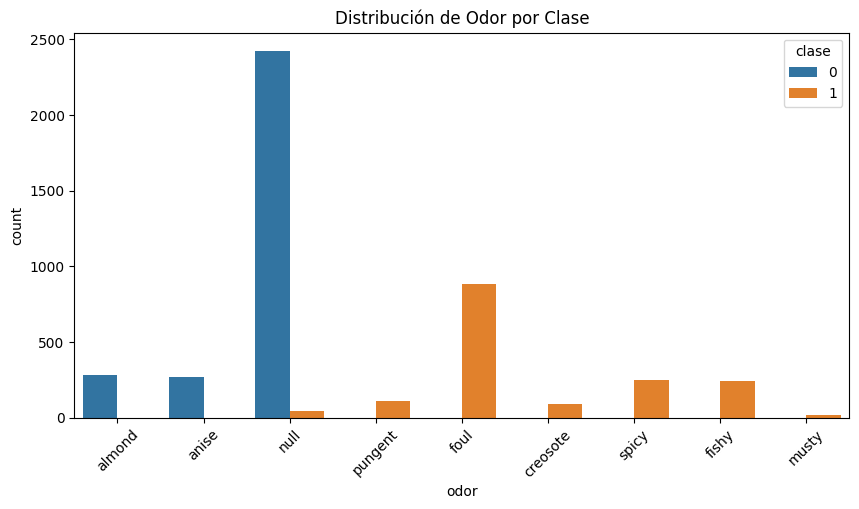

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_extra, x='odor', hue='clase')
plt.title('Distribución de Odor por Clase')
plt.xticks(rotation=45)
plt.show()

In [26]:
df_odor = df_extra[['clase','odor']]

In [27]:
df_nulllos = df_odor[df_odor['odor'] == 0]

In [28]:
df_nulllos['clase'].value_counts

<bound method IndexOpsMixin.value_counts of Series([], Name: clase, dtype: int64)>

In [29]:
df_extra.groupby('odor')['clase'].sum()

odor
almond        0
anise         0
creosote     89
fishy       241
foul        884
musty        15
null         46
pungent     107
spicy       251
Name: clase, dtype: int64

In [30]:
opciones = ["almond", "anise"]
filtro_no_venenoso = (df_extra["odor"] == 0) & (df_extra["clase"] == 0)
df_extra.loc[filtro_no_venenoso, "odor"] = np.random.choice(opciones, size=filtro_no_venenoso.sum(), replace=True)

In [31]:
filtro_venenoso = (df_extra["odor"] == 0) & (df_extra["clase"] == 1)
df_extra.loc[filtro_venenoso,'odor'] = df_extra['odor'].map({0:'foul'})
df_extra['odor'].value_counts()

odor
null        2470
foul         884
almond       279
anise        267
spicy        251
fishy        241
pungent      107
creosote      89
musty         15
Name: count, dtype: int64

In [32]:
df_extra[df_extra['stalk-root']=='equal']['clase'].value_counts()

clase
0    620
1    107
Name: count, dtype: int64

In [33]:
df_extra.groupby('stalk-root')['clase'].sum()

stalk-root
0          758
bulbous    751
club        17
equal      107
rooted       0
Name: clase, dtype: int64

# En esta funcion miramos la distribucion dentro de esta clase en particular

In [34]:
distribucion_por_clase = df_extra[df_extra["stalk-root"] != 0].groupby("clase")["stalk-root"].value_counts(normalize=True)

def imputar_stalk_root(row):
    if row["stalk-root"] == 0:
        clase = row["clase"]
        opciones = distribucion_por_clase[clase].index
        probabilidades = distribucion_por_clase[clase].values
        return np.random.choice(opciones, p=probabilidades)
    else:
        return row["stalk-root"]

df_extra["stalk-root"] = df_extra.apply(imputar_stalk_root, axis=1)

In [35]:
df_extra['stalk-root'].value_counts()

stalk-root
bulbous    3045
equal       953
club        444
rooted      161
Name: count, dtype: int64

## Aplicamos label encoder

In [36]:
df_encoded = df_extra.copy()
encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()

,clase,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises
Observacion,,,,,,,,,,,,,,,,,,,,,
0,0,2,2,8,0,1,0,0,0,0,...,3,7,7,2,1,4,1,2,0,1
1,0,0,2,7,1,1,0,0,1,0,...,3,7,7,2,1,4,1,2,2,1
3,0,2,2,3,6,1,1,0,0,1,...,3,7,7,2,1,0,1,0,0,0
4,0,2,1,8,0,1,0,0,1,0,...,3,7,7,2,1,4,0,2,0,1
5,0,0,2,7,0,1,0,0,4,0,...,3,7,7,2,1,4,0,2,2,1


## Visualización de la distribución de clase, La target de nuestro ejercicio

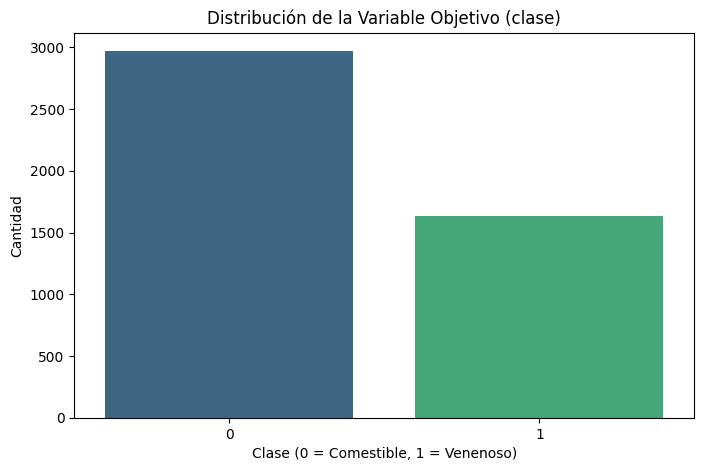

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_encoded['clase'], palette='viridis')
plt.title("Distribución de la Variable Objetivo (clase)")
plt.xlabel("Clase (0 = Comestible, 1 = Venenoso)")
plt.ylabel("Cantidad")
plt.show()
    

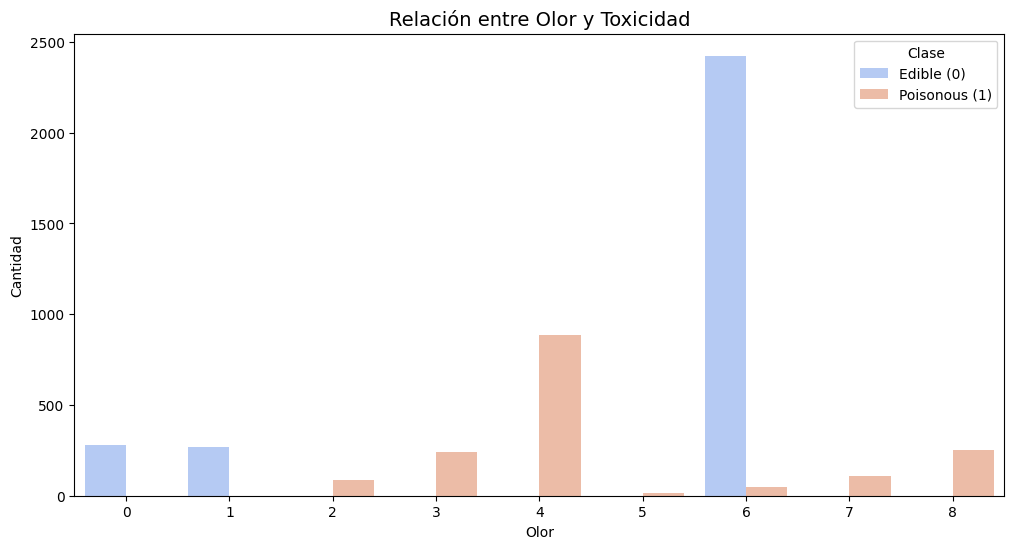

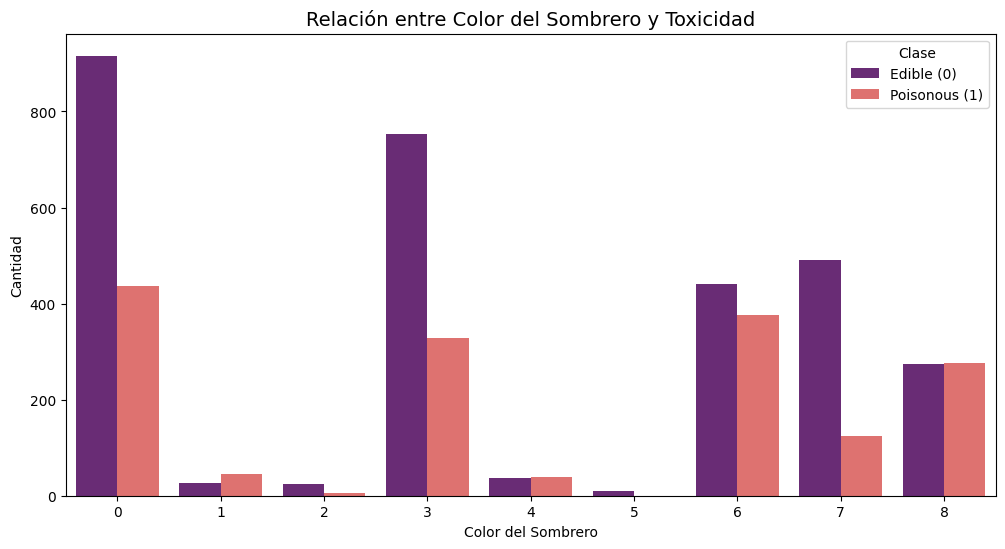

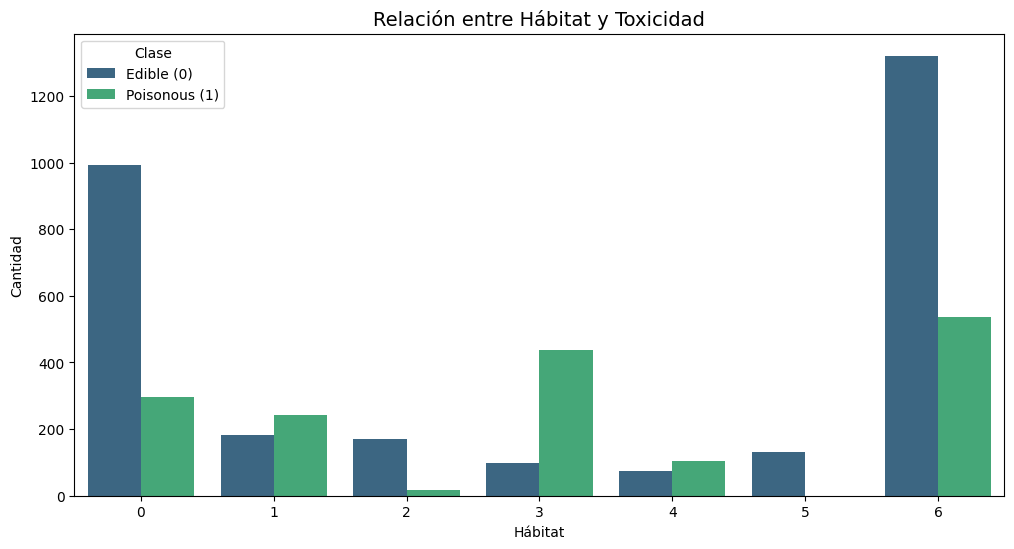

In [38]:
# Gráfico 1: Olor vs Toxicidad
plt.figure(figsize=(12, 6))
sns.countplot(x="odor", hue="clase", data=df_encoded, palette="coolwarm")
plt.title("Relación entre Olor y Toxicidad", fontsize=14)
plt.xlabel("Olor")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

# Gráfico 2: Color del sombrero vs Toxicidad
plt.figure(figsize=(12, 6))
sns.countplot(x="cap-color", hue="clase", data=df_encoded, palette="magma")
plt.title("Relación entre Color del Sombrero y Toxicidad", fontsize=14)
plt.xlabel("Color del Sombrero")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

# Gráfico 3: Hábitat vs Toxicidad
plt.figure(figsize=(12, 6))
sns.countplot(x="habitat", hue="clase", data=df_encoded, palette="viridis")
plt.title("Relación entre Hábitat y Toxicidad", fontsize=14)
plt.xlabel("Hábitat")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.show()


## Busquemos una correlacion 

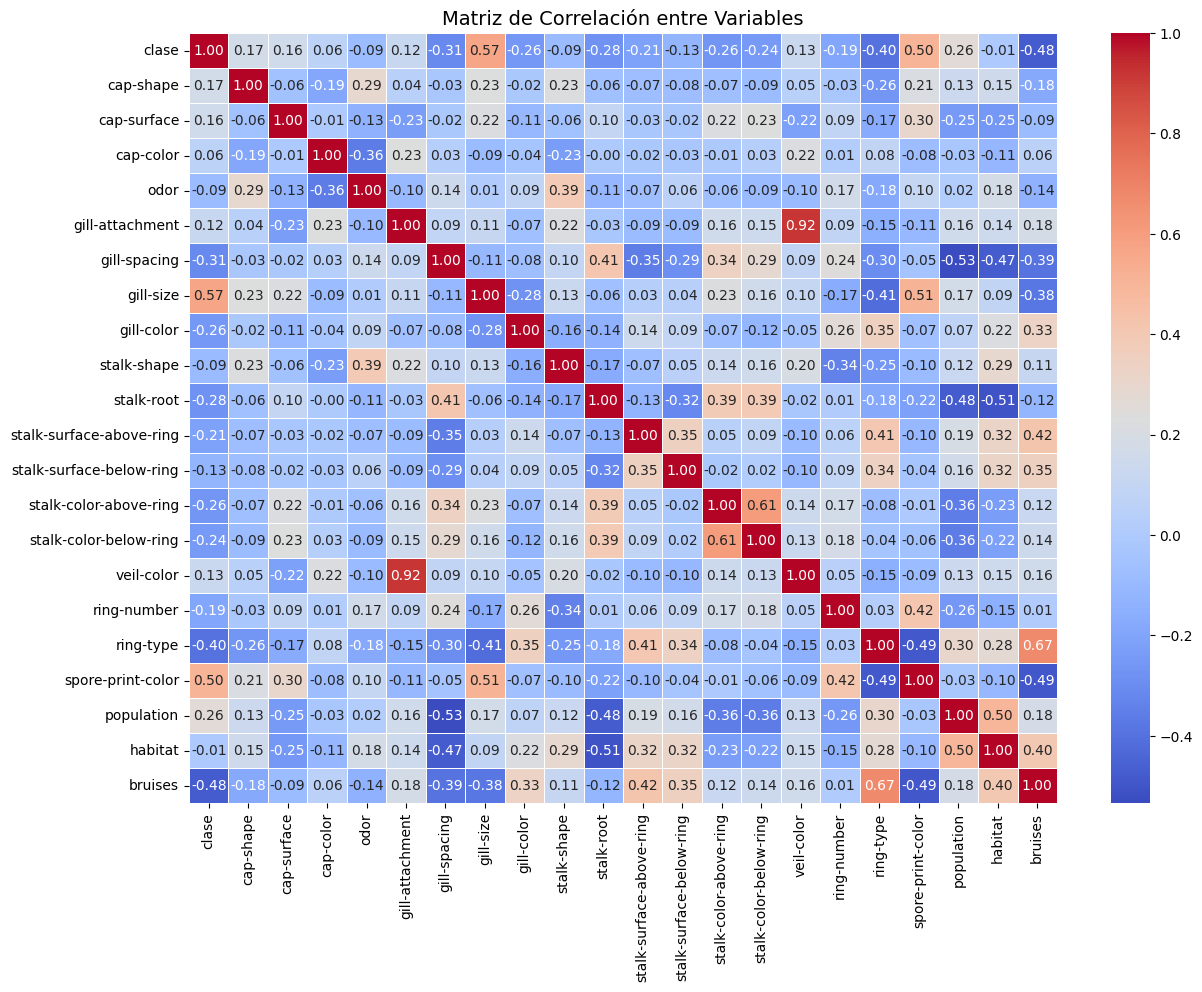

In [39]:
df_numeric = df_encoded.copy()

# Convertir variables categóricas a números (si aún no lo están)
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables", fontsize=14)
plt.show()

1. Variables más correlacionadas con la toxicidad (clase):

- Algunas características tienen valores de correlación más altos con clase, lo que indica que podrían ser útiles para predecir si un hongo es venenoso o comestible.
- Si hay alguna con correlación cercana a 1 o -1, significa que es un fuerte predictor.


# Visualizaciones de boxplots:

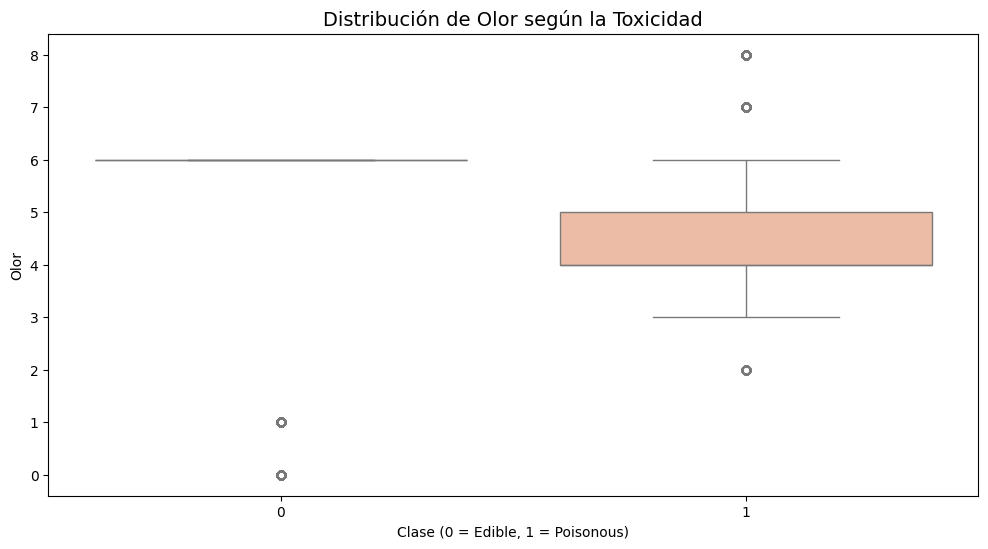

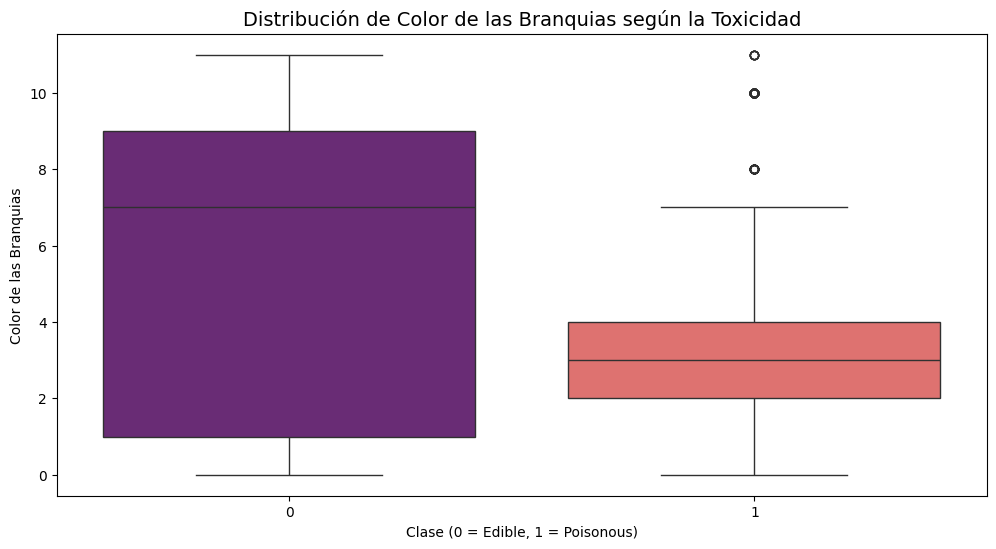

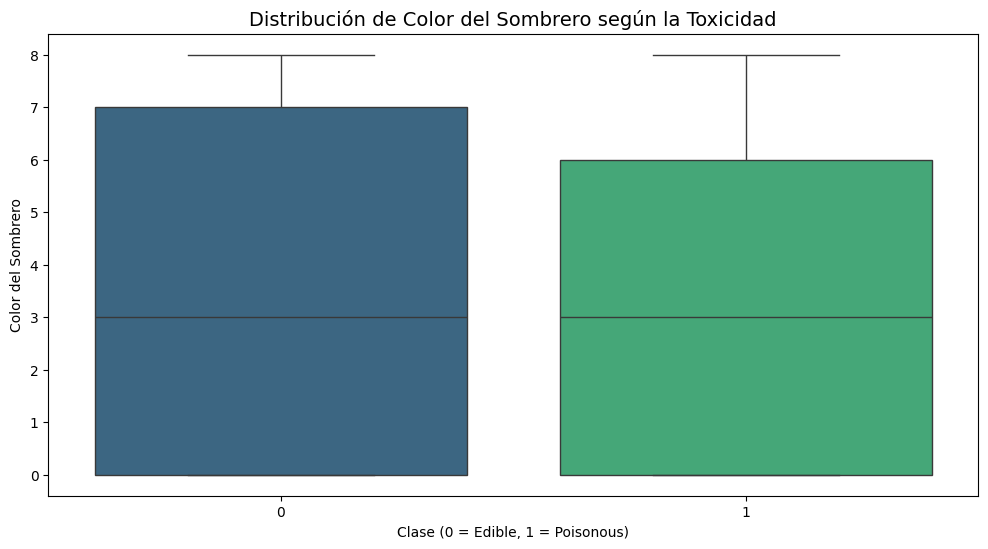

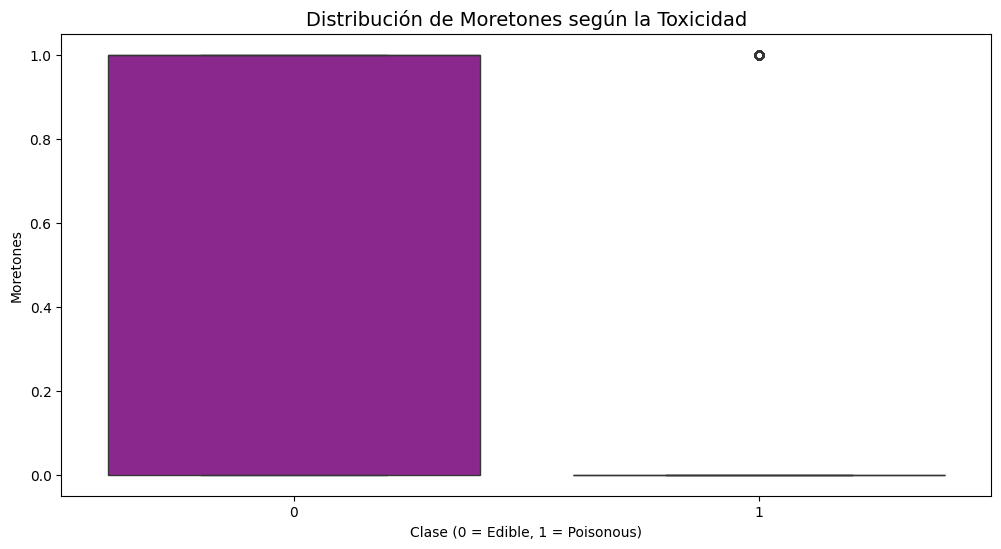

In [40]:
plt.figure(figsize=(12, 6))

# Gráfico 1: Boxplot de Odor vs Toxicidad
sns.boxplot(x="clase", y="odor", data=df_numeric, palette="coolwarm")
plt.title("Distribución de Olor según la Toxicidad", fontsize=14)
plt.xlabel("Clase (0 = Edible, 1 = Poisonous)")
plt.ylabel("Olor")
plt.show()

# Gráfico 2: Boxplot de Gill Color vs Toxicidad
plt.figure(figsize=(12, 6))
sns.boxplot(x="clase", y="gill-color", data=df_numeric, palette="magma")
plt.title("Distribución de Color de las Branquias según la Toxicidad", fontsize=14)
plt.xlabel("Clase (0 = Edible, 1 = Poisonous)")
plt.ylabel("Color de las Branquias")
plt.show()

# Gráfico 3: Boxplot de Cap Color vs Toxicidad
plt.figure(figsize=(12, 6))
sns.boxplot(x="clase", y="cap-color", data=df_numeric, palette="viridis")
plt.title("Distribución de Color del Sombrero según la Toxicidad", fontsize=14)
plt.xlabel("Clase (0 = Edible, 1 = Poisonous)")
plt.ylabel("Color del Sombrero")
plt.show()

# Gráfico 4: Boxplot de Bruises vs Toxicidad
plt.figure(figsize=(12, 6))
sns.boxplot(x="clase", y="bruises", data=df_numeric, palette="plasma")
plt.title("Distribución de Moretones según la Toxicidad", fontsize=14)
plt.xlabel("Clase (0 = Edible, 1 = Poisonous)")
plt.ylabel("Moretones")
plt.show()

# Observaciones clave:
1. Olor vs Toxicidad:

- Parece haber diferencias en el olor entre hongos venenosos y comestibles.
- Si hay valores bien diferenciados, esto puede ser un gran predictor de toxicidad.
 2. Color de las branquias vs Toxicidad:

- Algunas tonalidades pueden estar más asociadas con hongos venenosos o comestibles.
3. Color del sombrero vs Toxicidad:

- Si algunos colores solo aparecen en hongos venenosos o comestibles, puede ser una pista clave.
4. Moretones vs Toxicidad:

 - Esta variable puede ser útil.

## Variables categoricas

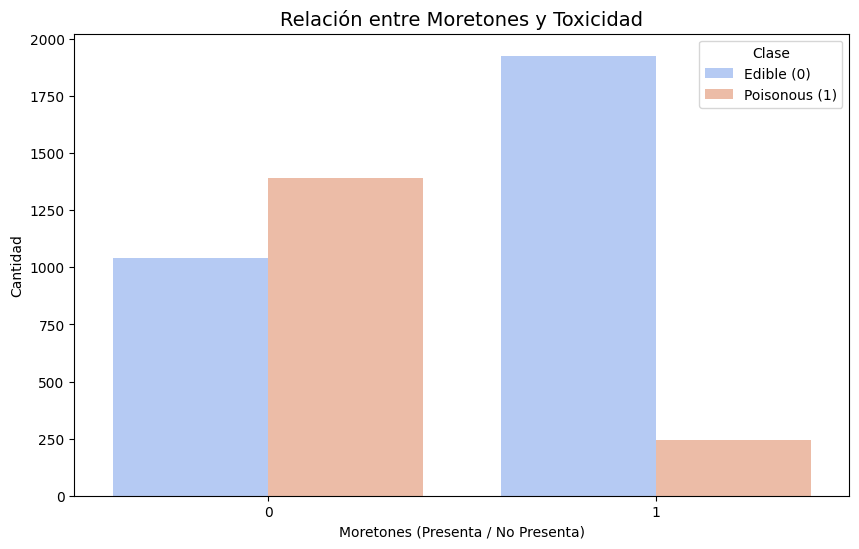

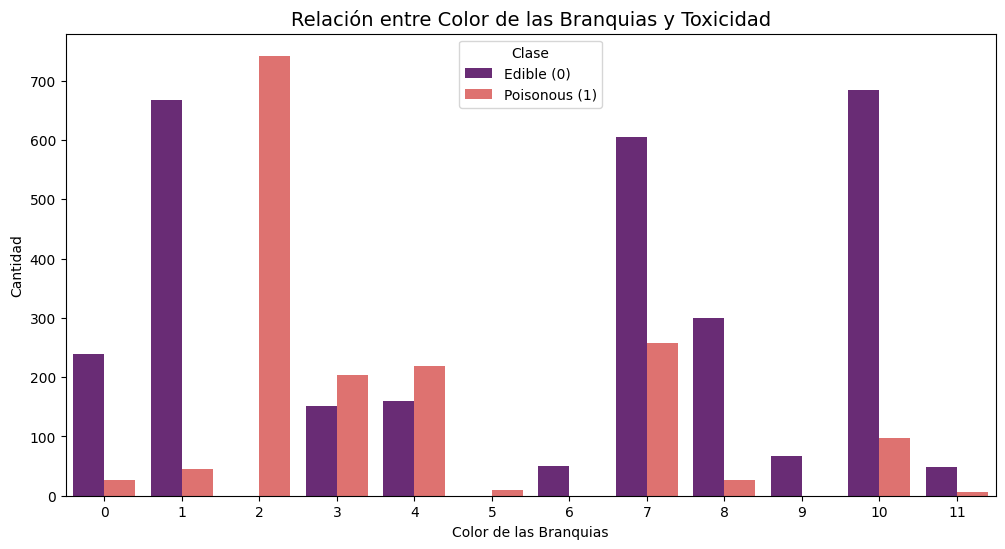

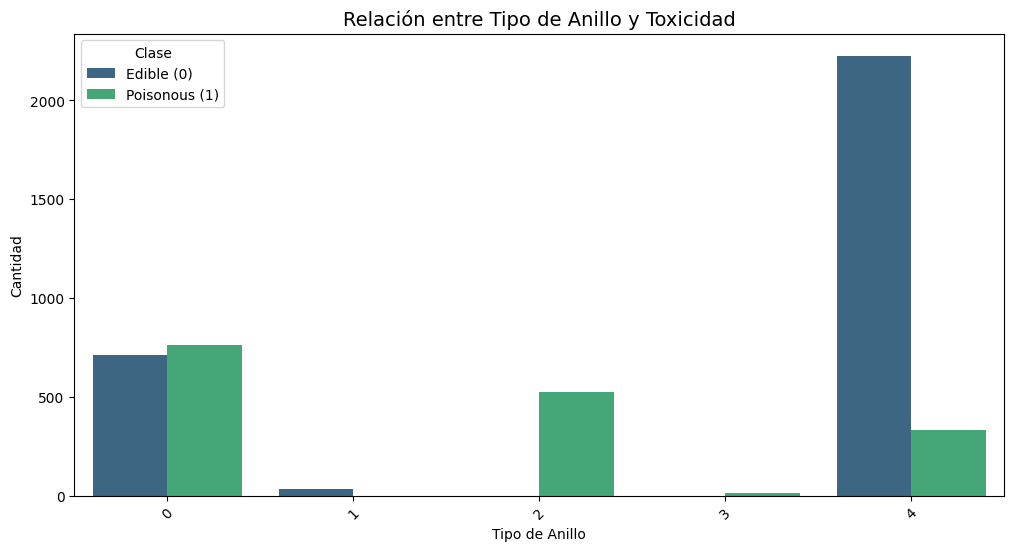

In [41]:
# Gráfico 1: Bruises vs Toxicidad
plt.figure(figsize=(10, 6))
sns.countplot(x="bruises", hue="clase", data=df_numeric, palette="coolwarm")
plt.title("Relación entre Moretones y Toxicidad", fontsize=14)
plt.xlabel("Moretones (Presenta / No Presenta)")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

# Gráfico 2: Gill Color vs Toxicidad
plt.figure(figsize=(12, 6))
sns.countplot(x="gill-color", hue="clase", data=df_numeric, palette="magma")
plt.title("Relación entre Color de las Branquias y Toxicidad", fontsize=14)
plt.xlabel("Color de las Branquias")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.show()

# Gráfico 3: Ring Type vs Toxicidad
plt.figure(figsize=(12, 6))
sns.countplot(x="ring-type", hue="clase", data=df_numeric, palette="viridis")
plt.title("Relación entre Tipo de Anillo y Toxicidad", fontsize=14)
plt.xlabel("Tipo de Anillo")
plt.ylabel("Cantidad")
plt.legend(title="Clase", labels=["Edible (0)", "Poisonous (1)"])
plt.xticks(rotation=45)
plt.show()


1. Moretones vs Toxicidad:

- Si los hongos venenosos y comestibles tienen una distribución diferente en esta variable, podría ser un buen indicador.
2. Color de las Branquias vs Toxicidad:

- Algunos colores parecen estar más asociados con hongos venenosos que otros.
- Esto puede ser útil para una futura clasificación.
3. Tipo de Anillo vs Toxicidad:

- Hay diferencias en la frecuencia de ciertos tipos de anillos entre hongos comestibles y venenosos.
- Si un tipo de anillo solo aparece en hongos venenosos, podría ser un predictor clave.

# Feature Importance

##### Preparacion de datos

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [43]:
df_encoded['clase'].value_counts(normalize=True)*100

clase
0    64.523137
1    35.476863
Name: proportion, dtype: float64

In [44]:
X = df_encoded.drop(columns=['clase','odor','stalk-root','ring-number'])
y = df_encoded['clase']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Entrenar modelo
- Entrenamos un modelo de **XGBoost**, que es un modelo de árboles de decisión que generalmente ofrece buenos resultados en problemas de clasificación. Lo entrenamos con nuestros datos preprocesados y lo probamos en un conjunto de prueba.

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      0.99      1.00       293

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



## Evaluacion de modelo

In [46]:
y_train_pred = xgb.predict(X_train)
print("Classification Report (Entrenamiento):")
print(classification_report(y_train, y_train_pred))

Classification Report (Entrenamiento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2342
           1       1.00      1.00      1.00      1340

    accuracy                           1.00      3682
   macro avg       1.00      1.00      1.00      3682
weighted avg       1.00      1.00      1.00      3682



## Manejamos test 

In [47]:
df_test.drop(columns=['id','veil-type','odor','stalk-root','ring-number'],inplace=True)

In [48]:
test = df_test.copy()

encoder = LabelEncoder()
for col in test.select_dtypes(include=['object']).columns:
    test[col] = encoder.fit_transform(test[col])

test.head()

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-type,spore-print-color,population,habitat
0,2,0,0,1,1,1,0,3,1,3,3,7,7,2,0,1,0,0
1,1,2,6,1,1,0,1,2,1,3,2,7,7,2,0,7,4,3
2,2,2,6,0,1,0,0,10,1,3,3,3,7,2,3,1,5,6
3,1,0,3,1,1,0,0,4,0,2,2,0,1,2,2,3,5,3
4,1,2,3,0,1,0,0,8,1,3,3,3,7,2,3,0,5,6


## 📈 Predicción y Generación de Resultados
- Finalmente, usamos el modelo entrenado para hacer predicciones en un conjunto de datos de prueba y generamos un archivo CSV con los resultados.


In [49]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'bruises'],
      dtype='object')

In [52]:
df_final = df_encoded[['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'bruises']]

In [53]:
test_pred = xgb.predict(df_final)

In [54]:
test_pred.sum()

np.int64(1631)

In [56]:
submis = pd.read_csv('data/sample_solution.csv')

In [62]:
submis


,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,1
...,...,...
1969,2090,0
1970,2536,0
1971,1215,0
1972,1896,0


In [63]:
test_pred = test_pred[:len(submis)] 

In [64]:
submis["class"] = test_pred

In [65]:
submis.to_csv("submission.csv", index=False)
print(submis.shape)
print(submis.head())

(1974, 2)
     id  class
0  1483      0
1  5111      0
2  3569      0
3  2426      0
4  2749      0
